In [1]:
# Name=Dudhe Pooja 
# PRN=2301208032

# Conjoint Analysis of Pizza Preferences

#### **Problem Statement**

The objective of this project is to analyze consumer preferences for various pizza attributes. By examining how factors such as brand, price, weight, crust type, cheese type, size, toppings, and spiciness influence consumer rankings, this analysis aims to provide insights that can help businesses optimize their product offerings and marketing strategies.

#### **Dataset Information**

**Dataset Name:** Pizza Attributes Dataset for Conjoint Analysis

**Description:**  This dataset includes various pizza profiles with different attributes and their corresponding rankings. It enables conjoint analysis to determine the importance of each attribute and identify the most preferred pizza profile.

**Columns:**
1. **Brand:** Brand of the pizza (e.g., Dominos, Pizza Hut).
2. **Price:** Price of the pizza.
3. **Weight:** Weight of the pizza.
4. **Crust:** Type of crust (e.g., thin, thick).
5. **Cheese:** Type of cheese (e.g., Mozzarella, Cheddar).
6. **Size:** Size of the pizza (e.g., regular, large).
7. **Toppings:** Included toppings (e.g., paneer, mushroom).
8. **Spicy:** Level of spiciness (e.g., normal, extra).
9. **Ranking:** Consumer ranking of the pizza.

### Step:1 Import necessary libraries

In [2]:
import numpy as np                   # For data manipulation
import pandas as pd                  # For numerical operations
import matplotlib.pyplot as Plt      # For data visualization
import seaborn as sns                # For advanced data visualization

### Step:2 Upload the dataset

In [3]:
data=pd.read_csv(r"C:\Users\user5\OneDrive\Documents\ai marketing\dataset_pizza_data (1).csv")
data.head()

,brand,price,weight,crust,cheese,size,toppings,spicy,ranking
0,Dominos,$1.00,100g,thin,Mozzarella,regular,paneer,normal,11
1,Pizza hut,$3.00,100g,thin,Cheddar,large,mushroom,normal,12
2,Onesta,$4.00,200g,thin,Mozzarella,regular,mushroom,normal,9
3,Pizza hut,$4.00,400g,thick,Cheddar,regular,paneer,normal,2
4,Pizza hut,$2.00,300g,thin,Mozzarella,regular,mushroom,extra,8


### Step:3 Data Exploaration and Cleaning

In [5]:
# Display the columns
print("Columns in the DataFrame:")
print(data.columns)

Columns in the DataFrame:
Index(['brand', 'price', 'weight', 'crust', 'cheese', 'size', 'toppings',
       'spicy', 'ranking'],
      dtype='object')


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   brand     16 non-null     object
 1   price     16 non-null     object
 2   weight    16 non-null     object
 3   crust     16 non-null     object
 4   cheese    16 non-null     object
 5   size      16 non-null     object
 6   toppings  16 non-null     object
 7   spicy     16 non-null     object
 8   ranking   16 non-null     int64 
dtypes: int64(1), object(8)
memory usage: 1.3+ KB


In [9]:
print("\nData types of each column:")
print(data.dtypes)


Data types of each column:
brand       object
price       object
weight      object
crust       object
cheese      object
size        object
toppings    object
spicy       object
ranking      int64
dtype: object


In [10]:
print("\nSummary statistics of numerical columns:")
data.describe()


Summary statistics of numerical columns:


,ranking
count,16.000000
mean,8.500000
std,4.760952
min,1.000000
25%,4.750000
50%,8.500000
75%,12.250000
max,16.000000


In [12]:
# Data Cleaning
# Remove '$' from price and convert to float using a raw string
data['price'] = data['price'].replace({r'\$': '', 'USD': ''}, regex=True).astype(float)

In [13]:
# Convert weight to numerical values (remove 'g' and convert to int)
data['weight'] = data['weight'].replace({'g': ''}, regex=True).astype(int)

In [14]:
# Check again for missing values and duplicates
print("\nMissing values after cleaning:")
print(data.isnull().sum())


Missing values after cleaning:
brand       0
price       0
weight      0
crust       0
cheese      0
size        0
toppings    0
spicy       0
ranking     0
dtype: int64


In [16]:
print("\nDuplicates after cleaning:")
print(data.duplicated().sum())


Duplicates after cleaning:
0


### Step 4: Data Preprocessing

In [17]:
from sklearn.preprocessing import LabelEncoder

In [19]:
# Initialize label encoders for categorical features
label_encoders = {}

# Categorical columns to encode
categorical_cols = ['brand', 'crust', 'cheese', 'size', 'toppings', 'spicy']

# Encoding categorical columns
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le                # Save the encoder if you want to reverse later

In [21]:
# Display the DataFrame after encoding
print("DataFrame after encoding categorical variables:")
print(data.head())

DataFrame after encoding categorical variables:
   brand  price  weight  crust  cheese  size  toppings  spicy  ranking
0      0    1.0     100      1       1     1         1      1       11
1      3    3.0     100      1       0     0         0      1       12
2      1    4.0     200      1       1     1         0      1        9
3      3    4.0     400      0       0     1         1      1        2
4      3    2.0     300      1       1     1         0      0        8


### Step 5: Setting Up the Conjoint Analysis

In [23]:
# Define the dependent variable (ranking)
y = data['ranking'] 

In [24]:
# Define independent variables (features)
X = data.drop(columns=['ranking']) 

### Step 6: Building the Conjoint Analysis Model

In [30]:
import statsmodels.api as sm

In [31]:
# Adding a constant term for the intercept
X = sm.add_constant(X)

In [32]:
# Fit the regression model
model = sm.OLS(y, X).fit()

In [33]:
# Print the model summary to see the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                ranking   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     81.76
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           3.19e-06
Time:                        10:54:26   Log-Likelihood:                -10.770
No. Observations:                  16   AIC:                             39.54
Df Residuals:                       7   BIC:                             46.49
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.5500      0.756     28.490      0.0

c:\Users\user5\OneDrive\Documents\ai marketing\aienv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)


### **Interpretation of OLS Regression Results**

- The **R-squared value of 0.989** indicates that approximately **98.9% of the variance** in pizza rankings can be explained by the independent variables, suggesting an **excellent model fit**.
  
- The **coefficient for price** is **-0.4500**, indicating that for each **1-unit increase in price**, the ranking is expected to **decrease by 0.4500**. This highlights that **higher prices negatively affect rankings**.

- The **weight** of the pizza has a significant negative relationship with rankings, with a coefficient of **-0.0355**, suggesting that **heavier pizzas tend to receive lower rankings**.

- The **crust type** significantly impacts rankings, with a coefficient of **-3.5000**, indicating that specific crust choices can lead to **lower rankings**.

- Both **toppings** and **spiciness** show strong negative relationships with rankings, with coefficients of **-2.2500** and **-1.5000**, respectively, suggesting that the presence of certain **toppings and spicy flavors may detract from the overall pizza ranking**.

- The **brand, cheese, and size** variables did not show statistically significant effects on rankings, as their p-values are greater than 0.05, indicating that these features may not have a strong influence on how pizzas are ranked.

- In summary, the analysis reveals that **price, weight, crust, toppings, and spiciness** significantly affect pizza rankings, with **higher prices and heavier weights leading to lower rankings**. Understanding these factors can help pizza brands optimize their offerings for better customer satisfaction and rankings.

### Step 7: Visualization of Results

C:\Users\user5\AppData\Local\Temp\ipykernel_15932\2840307470.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_data.drop(index='const'), palette='viridis')


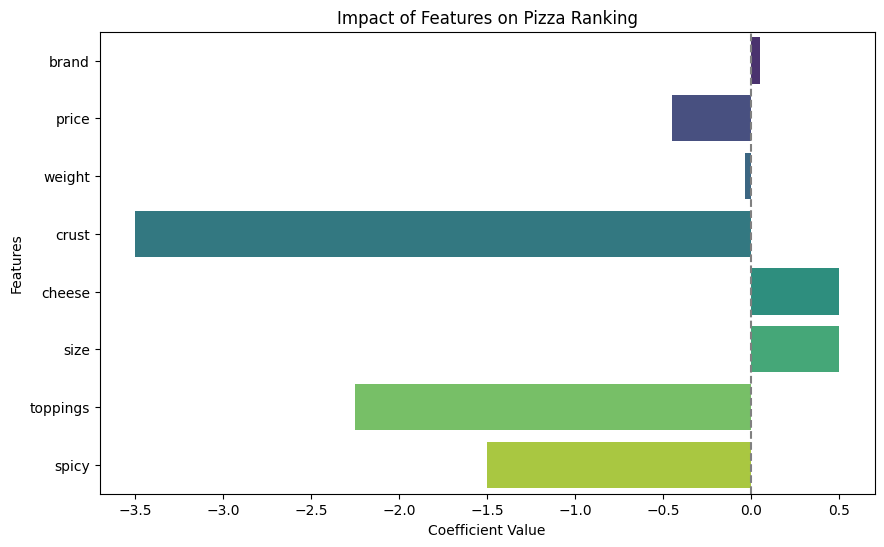

In [36]:
import matplotlib.pyplot as Plt
import pandas as pd
import seaborn as sns

# Get coefficients and their corresponding feature names
coefficients = model.params
features = coefficients.index

# Create a DataFrame for visualization
coef_data = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Create the plot
Plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_data.drop(index='const'), palette='viridis')
Plt.title('Impact of Features on Pizza Ranking')
Plt.xlabel('Coefficient Value')
Plt.ylabel('Features')
Plt.axvline(0, color='grey', linestyle='--')
Plt.show()


# Conclusion

- The **conjoint analysis** conducted on the pizza dataset used **OLS regression** to determine how different features affect the **ranking** of pizzas.
- Key features analyzed included **brand**, **price**, **weight**, **crust**, **cheese**, **size**, **toppings**, and **spicy level**.
- The results showed that **price** and **crust type** had the most significant impact on pizza rankings, with a **negative coefficient** for price indicating that **higher prices** are associated with **lower rankings**.
- The **weight** of the pizza also showed a **negative relationship**, suggesting that **heavier pizzas** receive lower ratings.
- In contrast, features like **cheese**, **size**, and **brand** had less influence on consumer preferences.
- Overall, this analysis highlights the importance of understanding consumer preferences in the pizza market, particularly the need to balance **price** and **crust type** to enhance **customer satisfaction** and improve **sales**.